# Larger and more frequent wildfores are cause for concern

Over the last few decades, wildfires have increased in both number and size across North America [(Schoennagel et al., 2017)](https://www.pnas.org/doi/abs/10.1073/pnas.1617464114). Regions such as the western United States have been hit particularly hard, where the problem is exacerbated by changes in climate, vegetation, and landuse. Not only are more swaths of land burning each year, but with urban sprawl forcing more people to build homes at and beyond the wildland-urban interface, increasing populations are put at risk of disaster.

In [1]:
# Import standard packages
import os                           # Reproducible file names
import warnings                     # View warnings

# Import third part packages
import cartopy.crs as ccrs          # Cartographic projections
import earthpy as et                # File organization
import geopandas as gpd             # Enables work in geodataframes
import geoviews as gv               # Enables work with geographic data
import holoviews as hv              # For use with interactive plotting
import hvplot.pandas                # Plotting maps and plots
import pandas as pd                 # Work with dataframes
import pyogrio                       # Help with import of geodatabase

warnings.simplefilter(action='ignore', category=FutureWarning)

### Watershed Dataset Description

The watershed data used in this analysis comes from the [USGS Watershed Boundary Dataset (WBD)](https://www.usgs.gov/national-hydrography/watershed-boundary-dataset) for the United States. All watersheds in this dataset have gauges for stream monitoring. The data used herein are the **HUC-2 Watersheds (Regional Scale)**. 

Describe the dataset and add citation

In [2]:
# Download watershed data from the WBD Website
# Data is a geodatabase of watersheds from the entire nation
# Note, to download large data, may need to change machine type of codespace
wbd_url = (
    "https://prd-tnm.s3.amazonaws.com/StagedProducts/Hydrography/WBD"
    "/National/GDB/WBD_National_GDB.zip")

wbd_dir = et.data.get_data(url=wbd_url)    # Path to downloaded file directory
wbd_dir

Extracted output to /home/jovyan/earth-analytics/data/earthpy-downloads/WBD_National_GDB


'/home/jovyan/earth-analytics/data/earthpy-downloads/WBD_National_GDB'

In [3]:
# Import 2-digit HU layer
# Call the GDB file
wbd_path = os.path.join(wbd_dir, 'WBD_National_GDB.gdb')

# Read in the GDB and layer of interest (regional watersheds - HU2)
wbd_hu2_gdf = gpd.read_file(wbd_path, layer='WBDHU2', from_disk=True)
wbd_hu2_gdf

,tnmid,metasourceid,sourcedatadesc,sourceoriginator,sourcefeatureid,loaddate,referencegnis_ids,areaacres,areasqkm,states,huc2,name,globalid,shape_Length,shape_Area,geometry
0,{9F7DA17F-2AB2-4A27-B6AD-C3475BBA7C4A},{9B974F85-8C9A-4C83-BEFE-4220D5A05E4C},NaN,U.S. Geological Survey,NaN,2023-04-07 14:00:31+00:00,NaN,1.172620e+08,474542.91,"LA,NM,TX",12,Texas-Gulf Region,{35877C00-D26A-41C3-9F0D-206C9B5BE58E},46.413397,44.840044,"MULTIPOLYGON (((-93.84012 29.70082, -93.83798 ..."
1,{7721F096-C381-4519-85C2-2FE21109F869},NaN,NaN,NaN,NaN,2019-12-05 11:32:03+00:00,NaN,3.846772e+06,15567.35,PR,21,Caribbean Region,{2112A6DE-FA49-4DC2-AB3C-9AEE503F07AF},10.105813,1.329539,"MULTIPOLYGON (((-67.09725 18.56685, -67.09633 ..."
2,{7271463E-B5E4-4017-8E10-24A186190541},{962ACAE6-5951-4092-A672-690F55332896},NaN,U.S. Geological Survey,NaN,2022-11-22 16:50:26+00:00,NaN,7.159207e+06,28972.31,HI,20,Hawaii Region,{2DD060A4-2AA4-4254-A72B-DFADC0203444},21.383554,2.520378,"MULTIPOLYGON (((-155.85308 20.31878, -155.8521..."
3,{4C2998C0-D39C-47B3-8848-549D9184B95B},NaN,NaN,NaN,NaN,2020-02-05 11:05:51+00:00,NaN,2.024969e+06,8194.77,"AS,GU",22,South Pacific Region,{5B166379-B4C7-4B81-A112-4BA6462EFC48},14.806282,0.688164,"MULTIPOLYGON (((144.94375 13.65124, 144.94392 ..."
4,{5C6AE09C-4CFC-4EBA-9344-A91AF35E73E8},{77406B88-053A-4214-A171-C18FBEB10EFD},NaN,U.S. Geological Survey,NaN,2022-02-18 11:15:42+00:00,NaN,1.042701e+08,421966.31,"IL,IN,KY,MD,NC,NY,OH,PA,TN,VA,WV",05,Ohio Region,{1490E469-EB78-491F-A748-68AECEAB0F21},61.425278,43.813424,"MULTIPOLYGON (((-79.03733 42.44863, -79.03682 ..."
5,{142390F9-84A3-42CF-A41C-ED4F0EB4E6FC},{DEDB32ED-1146-40BA-A9DE-9096A6CACC3B},NaN,U.S. Geological Survey,NaN,2022-02-16 16:21:23+00:00,NaN,2.618041e+07,105948.46,"AL,GA,KY,MS,NC,SC,TN,VA,WV",06,Tennessee Region,{7176C2D3-9F8D-47B4-B10D-AC718109BCA2},34.549371,10.537645,"MULTIPOLYGON (((-81.72338 37.24046, -81.72290 ..."
6,{629AF1ED-9415-452F-94CA-E43D64B86FCE},{CA072AAF-C871-4C1D-9034-B0BA44E28F8D},NaN,U.S. Geological Survey,NaN,2022-02-04 15:58:50+00:00,NaN,1.215571e+08,491924.54,"IA,IL,IN,KY,MI,MN,MO,ND,SD,WI",07,Upper Mississippi Region,{FDCD5A7D-B576-43B1-B016-32A60450C70B},79.648892,54.212842,"MULTIPOLYGON (((-94.32910 47.76904, -94.32969 ..."
7,{0A6AC738-CCB8-4C3E-B6F0-566885AE483C},{ADA3B896-18A1-44B9-AE66-A25A1CCD5AF1},NaN,U.S. Geological Survey,NaN,2022-02-23 13:44:43+00:00,NaN,6.821035e+07,276037.73,"AR,IL,KY,LA,MO,MS,TN",08,Lower Mississippi Region,{71639935-7971-4795-9774-9258215EFF90},49.847142,26.650553,"MULTIPOLYGON (((-90.33322 37.84773, -90.33299 ..."
8,{CD889A0A-B9F8-46F0-A12A-E2BED340DAC8},{834C3680-8F41-4C63-83CD-094AB5486761},NaN,U.S. Geological Survey,NaN,2021-12-22 09:15:23+00:00,NaN,1.477402e+08,597883.72,"CO,MX,NM,TX",13,Rio Grande Region,{F680883C-5BF8-4416-B7FB-2C8238AE2DDA},92.699828,56.476749,"MULTIPOLYGON (((-106.03348 38.45448, -106.0331..."
9,{55B52F2D-76B0-44EA-8BE7-B371E86617AC},NaN,NaN,NaN,NaN,2020-12-21 11:20:17+00:00,NaN,7.254242e+07,293569.02,"AZ,CO,NM,UT,WY",14,Upper Colorado Region,{708D8570-81D1-4AA2-9311-ADBD455BC916},44.609814,30.612941,"MULTIPOLYGON (((-110.03805 43.45087, -110.0364..."


<Axes: >

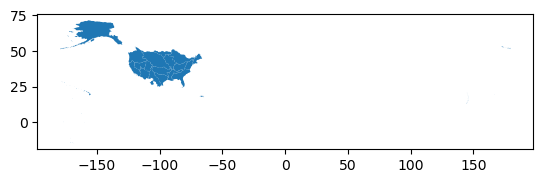

In [4]:
# Test plot to demonstrate successful import of data

# wbd_hu2_gdf.plot()

### Wildfire Dataset Description

The wildfire data used in this analysis comes from the [USDA's wildfire occurance data for the United States, 1992-2020](https://www.fs.usda.gov/rds/archive/Catalog/RDS-2013-0009.6). This is the fifth version of the dataset and was generated from reporting systems of federal, state, and local fire organizations.

Data Citation: 
Short, Karen C. 2022. Spatial wildfire occurrence data for the United States, 1992-2020 [FPA_FOD_20221014]. 6th Edition. Fort Collins, CO: Forest Service Research Data Archive. https://doi.org/10.2737/RDS-2013-0009.6

In [5]:
# Download wildfire occurance data from geodatabase

fire_url = (
    "https://www.fs.usda.gov/rds/archive/products/RDS-2013-0009.6"
    "/RDS-2013-0009.6_Data_Format2_GDB.zip"
)

fire_dir = et.data.get_data(url=fire_url)   # Path to downloaded fire directory
fire_dir

Extracted output to /home/jovyan/earth-analytics/data/earthpy-downloads/RDS-2013-0009.6_Data_Format2_GDB


'/home/jovyan/earth-analytics/data/earthpy-downloads/RDS-2013-0009.6_Data_Format2_GDB'

In [6]:
# Import fires layer from geodatabase (cashing data)
# Put import in an if statement to check if data already downloaded
fire_path = os.path.join(fire_dir, 'Data','FPA_FOD_20221014.gdb')
if not 'fire_gdf' in globals():
    print('fire_gdf does not exist. Loading...')
    fire_gdf = pyogrio.read_dataframe(fire_path, layer='Fires')

fire_gdf.head()                     # Prints only first few lines of data

fire_gdf does not exist. Loading...


,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry
0,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,...,0.10,A,40.036944,-121.005833,USFS,CA,63,06063,Plumas County,POINT (-121.00582 40.03694)
1,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,...,0.25,A,38.933056,-120.404444,USFS,CA,61,06061,Placer County,POINT (-120.40443 38.93305)
2,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,...,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,06017,El Dorado County,POINT (-120.73554 38.98416)
3,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,...,0.10,A,38.559167,-119.913333,USFS,CA,3,06003,Alpine County,POINT (-119.91332 38.55916)
4,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,...,0.10,A,38.559167,-119.933056,USFS,CA,3,06003,Alpine County,POINT (-119.93304 38.55916)


In [7]:
# Clean up the data (Lat/Long already assigned to geometry)
# Create an updated geodatabase, populating specific variables
# [[]] Two sets, one to search and one to define a list
fire_clean_gdf = (
    fire_gdf
    [['FOD_ID', 'DISCOVERY_DATE', 'FIRE_SIZE', 'geometry']]
    .set_index('FOD_ID')
)

# Convert the existing date to a datetime format
fire_clean_gdf.DISCOVERY_DATE = pd.to_datetime(fire_clean_gdf.DISCOVERY_DATE)

# Reproject dataframe to match the CRS of watershed boundary
print('Geodetic CRS before reprojection: ' + str(fire_clean_gdf.crs))
fire_clean_gdf = fire_clean_gdf.to_crs(wbd_hu2_gdf.crs)
print('Geodetic CRS after reprojection: ' + str(fire_clean_gdf.crs))

fire_clean_gdf                  # Use .info() to see data types

Geodetic CRS before reprojection: EPSG:4269
Geodetic CRS after reprojection: EPSG:5498


,DISCOVERY_DATE,FIRE_SIZE,geometry
FOD_ID,,,
1,2005-02-02,0.10,POINT (-121.00582 40.03694)
2,2004-05-12,0.25,POINT (-120.40443 38.93305)
3,2004-05-31,0.10,POINT (-120.73554 38.98416)
4,2004-06-28,0.10,POINT (-119.91332 38.55916)
5,2004-06-28,0.10,POINT (-119.93304 38.55916)
...,...,...,...
400732978,2020-06-05,1.00,POINT (-108.95949 39.03788)
400732979,2020-07-11,100.00,POINT (-119.50304 37.14861)
400732980,2020-08-27,50.00,POINT (-114.44279 46.15136)


In [8]:
# Spatially join the watershed with the fire history geodataframes
fire_region_gdf = (
    wbd_hu2_gdf[['name', 'geometry']]
    .sjoin(fire_clean_gdf, how='inner', predicate='intersects')
)

# Calculate max fire size for each year in watershed combination
fire_region_gdf = (fire_region_gdf
    .groupby(['name', fire_region_gdf.DISCOVERY_DATE.dt.year])
    .agg(
        max_fire_size=('FIRE_SIZE','max'),      # New name = old, how
        num_fires=('index_right', 'count'))     # New name = old, how
)

print('Total number of fires: ' + str(fire_region_gdf.num_fires.sum()))
fire_region_gdf

Total number of fires: 2303566


max_fire_size  num_fires
name                     DISCOVERY_DATE                          
Alaska Region            1992                 48087.00        480
                         1993                215360.00        859
                         1994                 43329.70        639
                         1995                  8500.00        414
                         1996                 66560.00        718
...                                                ...        ...
Upper Mississippi Region 2016                   800.00       1396
                         2017                   700.00       1688
                         2018                   402.00       2695
                         2019                   365.03       1595
                         2020                   500.00       2218

[605 rows x 2 columns]

In [9]:
#Calculate the area of each watershed (use Albers Equal Area Projection)
wbd_hu2_gdf['area_ha'] = (        # Add an area column to gdf
    wbd_hu2_gdf.to_crs(9822)      # Convert new temp gdf to Albers epsg
    .area/10000/1000000           # Calculate the watershed area (millions ha)
)                                 # Note 1 hectare is 10,000 sq.m.

# Calculate total number of fires in each watershed region
fire_count_df = (fire_region_gdf  # Note that this is a regualar dataframe
    .reset_index()                # Reset because name is currently in index
    [['name', 'num_fires']]
    .groupby('name')              # Group by the name of the region
    .sum()                        # Sum of the number of fires 
)
fire_density_gdf=(wbd_hu2_gdf     # Note that this will be a geodataframe
    .set_index('name')
    .join(fire_count_df)          # Join wbd to fire_density gdf
    [['num_fires', 'area_ha', 'geometry']] # Add area and geomety back in
)

# Calculate fire density (number of fires per area)
fire_density_gdf['fire_density_per_ha'] = (
    fire_density_gdf.num_fires / fire_density_gdf.area_ha
)

# Print the index
fire_density_gdf.fire_density_per_ha

name
Texas-Gulf Region              2955.481041
Caribbean Region              12172.193876
Hawaii Region                  3038.323496
South Pacific Region                   NaN
Ohio Region                    1768.222974
Tennessee Region               4997.292091
Upper Mississippi Region       1198.694307
Lower Mississippi Region       2434.538701
Rio Grande Region               532.420081
Upper Colorado Region          1740.222490
Arkansas-White-Red Region      2259.885076
Great Basin Region             1065.024085
California Region              5755.310266
Lower Colorado Region          2832.237331
Souris-Red-Rainy Region        1370.761918
Pacific Northwest Region       2070.329697
Great Lakes Region              851.347001
Alaska Region                    61.640355
Missouri Region                1039.176697
South Atlantic-Gulf Region     8151.334498
New England Region             1813.205693
Mid Atlantic Region            4612.704632
Name: fire_density_per_ha, dtype: float64

In [11]:
# Set values for ylabels and titles
labels = pd.DataFrame(dict(
    column_name = ['max_fire_size', 'num_fires'],
    ylabel = ['Fire Size (million ha)', 'Number of Fires'],
    title = ['Largest fire on record in the region', 
             'Total number of fires in the region']))

def fire_plot(region_name, df=fire_region_gdf, labels=labels):
    """
    Create a multi-panel plot for a region

    Parameters
    ----------
    region_name : str
      The name of the region to generate a plot for. Must exists 
      in the 'name' index of df.
    df : pd.DataFrame
      The dataframe with the data to plot. Columns much match
      an item in labels.column_name to be plotted
    labels : pd.DataFrame
      Plot labels. Must have a 'column_name', 'ylabel', and 'title'
      columns with str values. Each row will be a subplot.

    Returns
    -------
    plot : hv.core.layout.Layout
      A holoviews plot layout or similar. For use with hv.DynamicMap.
    """
    # Generate a subplot for each row in the labels
    subplots = []
    # Iterate through the labels row by row (labels is a gdf)
    for i, labs in labels.iterrows():
        # Create subplot (for each region name row in gdf, create an hvplot)
        subplot = (
            df.xs(region_name, level='name')  # Look for name in name index
            [[labs.column_name]]              # Take column name in labels gdf
            .hvplot(
                xlabel='Year', ylabel=labs.ylabel,
                title=labs.title,
                width=1000,                   # Set plot width
                color='red', size=2           # Set line color and width
            ))
        subplots.append(subplot)              # Accumulate subplots in a list

    # Stack the subplots vertically
    plot = hv.Layout(subplots).cols(1)        # Use holoview, combine subplots
    return plot

# Create a dropdown menu to switch between regions
(
    hv.DynamicMap(
        # The plotting function for the two-panel fire history
        fire_plot,
        # Define the dimension for the dropdown
        kdims=[('region', 'Region')])         # (name of index, label name)
    # Add the explicit indexing - region names as a bokeh dimension
    .redim.values(region=fire_region_gdf.reset_index().name)
)

# region = input('What do you want to use?')    # Allows user to choose

/opt/conda/lib/python3.10/site-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  layout_plot = gridplot(
/opt/conda/lib/python3.10/site-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  layout_plot = gridplot(


BokehModel(combine_events=True, render_bundle={'docs_json': {'fab6e60b-9f85-4d74-94ec-a2d6a4233a91': {'version…

In [12]:
# Simplify the gdf geometries
fire_density_gdf.geometry = (
    fire_density_gdf.geometry.simplify(tolerance=0.1)
)

In [13]:
# Create a chloropleth map of fire density (geoviews polygons geometry)
poly_plot = (
    gv.Polygons(fire_density_gdf            # Use Geoviews polygon geometry
                .drop(                      # Remove Alaska and Hawaii data
                    ['Alaska Region', 'Hawaii Region'],
                      axis='rows')
                .reset_index()              # Reset index to extract 'name'
                .dropna()                   # Remove NAN values
                [['fire_density_per_ha', 'geometry']])
    .opts(                                  # Set plotting options
        width=1000, height=600,
        colorbar=True, color='fire_density',
        cmap='plasma', line_color='white',
        xaxis='bare', yaxis='bare', tools=['hover']
    )
)
((gv.tile_sources.OSM * poly_plot).opts(
    data_aspect=1,
    # projection=ccrs.PlateCarree(central_longitude=-121))
))

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (fire_density_per_ha)